In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive

In [0]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd  "/content/drive/My Drive/colab"

/content/drive/My Drive/colab


In [0]:
ls


abc.png             out.png           Step4_asian.png     Test2.jpg
Anospecs_asian.png  photo1.jpg        Step5_asian.png     test_3.jpg
Bebe_asian.png      photo.jpg         Step6_asian.png     test3.jpg
Big_asian.png       second_asian.png  Step7_asian.png     test_4.jpg
bw_image.png        Shades_asian.png  Step8_asian.png     test_asian.png
first_asian.png     Shawn_asian.png   Step9_asian.png     test.jpg
Four_asian.png      Spects_asian.png  Teeth_asian.png     test_mw.jpg
GAN_mnist.ipynb     static/           Teethboy_asian.png  testx.jpg
images/             Step10_asian.png  test_0.jpg          Third_asian.png
Justin_asian.png    Step1_asian.png   test_1.jpg
model/              Step2_asian.png   Test2_asian.png
Nick_asian.png      Step3_asian.png   test_2.jpg


In [0]:
cd static

/content/drive/My Drive/colab/static


In [0]:
ls


abc.png             out.png           Step4_asian.png     Test2.jpg
Anospecs_asian.png  photo1.jpg        Step5_asian.png     test_3.jpg
Bebe_asian.png      photo.jpg         Step6_asian.png     test3.jpg
Big_asian.png       second_asian.png  Step7_asian.png     test_4.jpg
bw_image.png        Shades_asian.png  Step8_asian.png     test_asian.png
first_asian.png     Shawn_asian.png   Step9_asian.png     test.jpg
Four_asian.png      Spects_asian.png  Teeth_asian.png     test_mw.jpg
GAN_mnist.ipynb     static/           Teethboy_asian.png  testx.jpg
images/             Step10_asian.png  test_0.jpg          Third_asian.png
Justin_asian.png    Step1_asian.png   test_1.jpg
model/              Step2_asian.png   Test2_asian.png
Nick_asian.png      Step3_asian.png   test_2.jpg


In [0]:
Y = np.zeros(y.shape[0])
Y[:204] = 9
Y[204:409] = 0
Y[409:615] = 7
Y[615:822] = 6
Y[822:1028] = 1
Y[1028:1236] = 8
Y[1236:1443] = 4
Y[1443:1649] = 3
Y[1649:1855] = 2
Y[1855:] = 5
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size = .02, random_state = 2) ## splitting into train and test set

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Conv2D, MaxPooling2D, BatchNormalization
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input/Sign-language-digits-dataset"))

In [0]:
X=np.load('static/sign/X.npy')
y=np.load('static/sign/Y.npy')

X shape : (2062, 64, 64)  Y shape: (2062, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


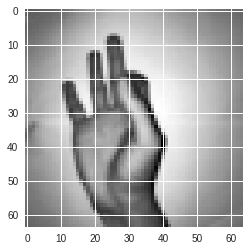

In [0]:
print('X shape : {}  Y shape: {}'.format(X.shape, y.shape))

plt.imshow(X[0], cmap='gray')
print(y[0]) # one-hot labels starting at zero

In [0]:
datagen = ImageDataGenerator(
    rotation_range=16,
    width_shift_range=0.12,
    height_shift_range=0.12,
    zoom_range=0.12
    )

In [0]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=8)
# add another axis representing grey-scale
Xtest = Xtest[:,:,:,np.newaxis]
Xtrain=Xtrain[:,:,:,np.newaxis]


In [0]:
datagen.fit(Xtrain)

In [0]:
model = Sequential()

# Convolutional Blocks: (1) Convolution, (2) Activation, (3) Pooling
model.add(Conv2D(input_shape=(64, 64, 1), filters=64, kernel_size=(4,4), strides=(2)))
model.add(Activation('relu'))
#outputs a (20, 20, 32) matrix
model.add(Conv2D(filters=64, kernel_size=(4,4), strides=(1)))
model.add(Activation('relu'))
#outputs a (8, 8, 32) matrix
model.add(MaxPooling2D(pool_size=4))

# dropout helps with over fitting by randomly dropping nodes each epoch
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Adadelta(),
             metrics=['accuracy'])
model.fit(Xtrain, ytrain, batch_size=32, epochs=10)

score = model.evaluate(Xtest, ytest, verbose=0)

Epoch 1/10
1649/1649 [==============================] - 2s 1ms/step - loss: 1.4738 - acc: 0.4961
Epoch 2/10
1649/1649 [==============================] - 1s 540us/step - loss: 0.6374 - acc: 0.7865
Epoch 3/10
1649/1649 [==============================] - 1s 535us/step - loss: 0.4339 - acc: 0.8757
Epoch 4/10
1649/1649 [==============================] - 1s 543us/step - loss: 0.3171 - acc: 0.9084
Epoch 5/10
1649/1649 [==============================] - 1s 528us/step - loss: 0.2525 - acc: 0.9224
Epoch 6/10
1649/1649 [==============================] - 1s 524us/step - loss: 0.1774 - acc: 0.9478
Epoch 7/10
1649/1649 [==============================] - 1s 506us/step - loss: 0.1586 - acc: 0.9497
Epoch 8/10
1649/1649 [==============================] - 1s 513us/step - loss: 0.1273 - acc: 0.9612
Epoch 9/10
1649/1649 [==============================] - 1s 512us/step - loss: 0.0947 - acc: 0.9721
Epoch 10/10
1649/1649 [==============================] - 1s 502us/step - loss: 0.0735 - acc: 0.9782


(1, 64, 64, 1)
[[4.8092108e-05 2.5654372e-04 1.7850519e-06 1.6114325e-05 8.3100786e-05
  5.3612289e-06 1.8405444e-04 6.5337094e-03 2.1592291e-06 9.9286908e-01]]


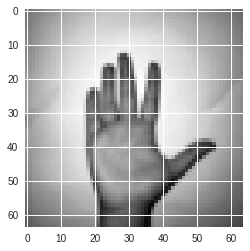

In [0]:
test_image = Xtest[60]
test_image_array = test_image.reshape(64, 64)
test_image = np.expand_dims(test_image, axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)

plt.imshow(test_image_array, cmap='gray')


In [0]:
print(np.round(result, 1))
print(ytest[60])


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [0]:
#testing the recognition output


In [0]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

VIDEO_HTML = """
<video autoplay
 width=500 height=500></video>
<script>
var video = document.querySelector('video')
navigator.mediaDevices.getUserMedia({ video: true })
  .then(stream=> video.srcObject = stream)
  
var data = new Promise(resolve=>{
  video.onclick = ()=>{
    var canvas = document.createElement('canvas')
    var [w,h] = [video.offsetWidth, video.offsetHeight]
    canvas.width = 64
    canvas.height = 64
    canvas.getContext('2d')
          .drawImage(video, 0, 0, w, h)
    video.srcObject.getVideoTracks()[0].stop()
    video.replaceWith(canvas)
    resolve(canvas.toDataURL('image/jpeg', %f))
  }
})
</script>
"""
def take_photo(filename='test_0.jpg', quality=1.0):
  display(HTML(VIDEO_HTML % quality))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return len(binary)

In [0]:
take_photo()

In [0]:
from skimage import color
from skimage import io

img = color.rgb2gray(io.imread('test_0.jpg'))


(1, 64, 64, 1)
[[2.5967625e-04 9.7724867e-01 5.6275805e-03 4.9945619e-03 2.8082638e-03
  6.3550281e-03 1.2675974e-03 1.9922944e-04 1.1610377e-03 7.8337798e-05]]


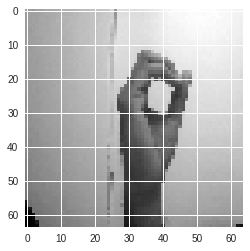

In [0]:
test_image = img
test_image_array = test_image.reshape(64, 64)
test_image = np.expand_dims(test_image, axis = 0)
test_image = np.expand_dims(test_image, axis = 3)

print(test_image.shape)
result = model.predict(test_image)
print(result)
plt.imshow(test_image_array, cmap='gray')

In [0]:
print(np.round(result, 1))


[[0.3 0.3 0.  0.  0.  0.1 0.3 0.  0.  0. ]]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:
from keras.models import load_model

model.save('gexa_model.h5')

In [0]:
!pip install pygame

    100% |████████████████████████████████| 12.1MB 4.6MB/s 


In [0]:
s=set([1,2])

In [0]:
set([3,3,3,2,2,2,1,1,1])

{1, 2, 3}

In [0]:
len(s)

2